In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import hvplot.pandas
import pandas as pd

In [2]:
# Load the data for Counties growth rate analysis
df = pd.read_csv(
    Path("../../../../../data/processed_data/ev_main_dataset.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.000013,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.000026,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000010,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000002,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.000015,NaN
...,...,...,...,...,...,...,...,...,...,...
2006,2022,TX,Wood County,"[75410, 75444, 75494, 75497, 75765, 75773, 75783]",46930,188,0,61748,0.004006,3.101753
2007,2022,TX,Yoakum County,"[79323, 79355]",7484,10,1,80317,0.001336,9.105559
2008,2022,TX,Young County,"[76372, 76374, 76450, 76460, 76481]",18012,94,0,65565,0.005219,5.688565
2009,2022,TX,Zapata County,"[78067, 78076, 78564]",13838,10,0,35061,0.000723,0.671123


In [3]:
# Inspect the columns of the data
for index, value in enumerate(df.columns):
    print(index, value)

0 year
1 state
2 county
3 zip_codes
4 population
5 ev_registrations
6 cumulative_ev_stations
7 median_income
8 ev_adoption_rate
9 ev_growth_rate


In [4]:
# Convert `ev_adoption_rate` and `ev_growth_rate` to percentages
df["ev_adoption_rate"] = df["ev_adoption_rate"] * 100
df["ev_growth_rate"] = df["ev_growth_rate"] * 100

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.001322,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.002639,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000950,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000215,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.001481,NaN
...,...,...,...,...,...,...,...,...,...,...
2006,2022,TX,Wood County,"[75410, 75444, 75494, 75497, 75765, 75773, 75783]",46930,188,0,61748,0.400597,310.175344
2007,2022,TX,Yoakum County,"[79323, 79355]",7484,10,1,80317,0.133618,910.555852
2008,2022,TX,Young County,"[76372, 76374, 76450, 76460, 76481]",18012,94,0,65565,0.521874,568.856477
2009,2022,TX,Zapata County,"[78067, 78076, 78564]",13838,10,0,35061,0.072265,67.112299


In [5]:
# Create a function to get the top 10 counties by EV adoption rate
def get_top_10_counties(df, year_column='year', rate_column='ev_adoption_rate', county_column='county'):
    # Determine the most recent year in the DataFrame
    most_recent_year = df[year_column].max()
    
    # Filter the DataFrame for the most recent year
    recent_year_df = df.loc[df[year_column] == most_recent_year]
    
    # Get the top 10 counties by EV adoption rate
    top_10_df = recent_year_df.nlargest(10, rate_column)
    
    # Return the list of top 10 counties
    return top_10_df[county_column].tolist()

In [6]:
# Variables: `title_style`, `axis_style`, and `legend_style` 
# Create a dictionary of styles to use with axes for titles, labels, and legends

# Set the style for the plot title
title_style = {
    "color": "#2c3e50",  
    "fontsize": 22,       
    "fontweight": "bold",
    "fontfamily": "DejaVu Sans", 
    "ha": "center", 
}

# Set the style for the x and y labels
axis_style = {
    "color": "#34495e",
    "fontsize": 18,
    "fontweight": "semibold",
    "fontfamily": "DejaVu Sans",
    "fontstyle": "italic",
}

# Set the style for legend
legend_style = {
    "fontsize": "small",
    "frameon": True,
    "facecolor": "#ecf0f1",
    "edgecolor": "#bdc3c7",
    "labelspacing": 1,
    "shadow": True,
}

In [7]:
# Create a custom line plot function to use with Seaborn
def custom_line_plot(df, ax, x, y, hue, title, x_label, y_label, leg_title, col=2):

    # Create the line plot with our parameters
    ax = sns.lineplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        marker="o",
        palette='deep'
    )

    # Set the title and labels using our styles
    ax.set_title(f'{title}', fontdict=title_style)
    ax.set_xlabel(f'{x_label}', fontdict=axis_style)
    ax.set_ylabel(f'{y_label}', fontdict=axis_style)

    # Adjust the legend to fit the plot
    ax.legend(title=f'{leg_title}', loc="best", ncol=col, **legend_style)

    return ax

In [8]:
# Create a custom bar plot function to use with Seaborn
def custom_bar_plot(df, ax, x, y, hue, title, xlabel, ylabel, rotation=0):
    
    # Plot the data using a barplot
    sns.barplot(
        data=df, 
        x=x, 
        y=y,
        hue=hue,
        ax=ax, 
        edgecolor='black',
        alpha=0.8
    )

    #  Set the cube helix color palette
    sns.cubehelix_palette(len(df[hue].unique()))

    # Set the title and labels using our styles
    ax.set_title(f'{title}', title_style)
    ax.set_xlabel(f'{xlabel}', axis_style)
    ax.set_ylabel(f'{ylabel}', axis_style)

    # Add grid and adjust layout
    ax.grid(True)

    return ax


In [9]:
tx_df = df[df["state"] == "TX"].sort_values(["year", "state", "county"]).reset_index(drop=True)
fl_df = df[df["state"] == "FL"].sort_values(["year", "state", "county"]).reset_index(drop=True)
ca_df = df[df["state"] == "CA"].sort_values(["year", "state", "county"]).reset_index(drop=True)

display(tx_df.head(2))
display(fl_df.head(2))
display(ca_df.head(2))

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2017,TX,Anderson County,"[75763, 75779, 75801, 75802, 75803, 75832, 758...",58175,1,0,42313,0.001719,NaN
1,2017,TX,Andrews County,[79714],17603,1,0,70753,0.005681,NaN


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2018,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",268851,766,12,49078,0.284916,NaN
1,2018,FL,Baker County,"[32040, 32063, 32072, 32087]",28353,5,0,61769,0.017635,NaN


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.001322,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.002639,NaN


In [10]:
tx_top_10_list = get_top_10_counties(tx_df, rate_column='ev_growth_rate')
fl_top_10_list = get_top_10_counties(fl_df, rate_column='ev_growth_rate')
ca_top_10_list = get_top_10_counties(ca_df, rate_column='ev_growth_rate')

print("TX:", tx_top_10_list)
print("FL:", fl_top_10_list)
print("CA:", ca_top_10_list)

TX: ['Kinney County', 'San Saba County', 'Culberson County', 'Reeves County', 'Falls County', 'Coke County', 'Floyd County', 'Donley County', 'Terry County', 'Yoakum County']
FL: ['Martin County', 'Clay County', 'Orange County', 'Duval County', 'Lee County', 'Jackson County', 'Leon County', 'Marion County', 'Calhoun County', 'Franklin County']
CA: ['Orange County', 'Trinity County', 'Lake County', 'Sierra County', 'Mono County', 'Alpine County', 'Colusa County', 'Plumas County', 'Inyo County', 'Tehama County']


In [11]:
# Create a seperate DataFrame for the top 10 counties in Texas, Florida, and California
tx_top_10_df = tx_df.copy()
fl_top_10_df = fl_df.copy()
ca_top_10_df = ca_df.copy()

In [12]:
# Filter the DataFrames to include only the top 10 counties
tx_top_10_df = tx_top_10_df[tx_top_10_df['county'].isin(tx_top_10_list)]
fl_top_10_df = fl_top_10_df[fl_top_10_df['county'].isin(fl_top_10_list)]
ca_top_10_df = ca_top_10_df[ca_top_10_df['county'].isin(ca_top_10_list)]

# Preview the top 10 counties DataFrames
display(tx_top_10_df.head(2))
display(fl_top_10_df.head(2))
display(ca_top_10_df.head(2))

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
167,2018,TX,Culberson County,[79855],2194,1,0,33417,0.045579,NaN
176,2018,TX,Falls County,"[76570, 76632, 76656, 76661, 76680, 76685]",17231,1,0,38032,0.005803,NaN


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
6,2018,FL,Calhoun County,"[32421, 32424, 32430, 32449]",14543,5,0,38609,0.034381,NaN
9,2018,FL,Clay County,"[32003, 32006, 32030, 32043, 32050, 32065, 320...",215908,382,0,62653,0.176927,NaN


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
6,2010,CA,Lake County,"[95422, 95423, 95424, 95426, 95435, 95443, 954...",64735,1,0,39491,0.001545,NaN
11,2010,CA,Orange County,"[90620, 90621, 90622, 90623, 90624, 90630, 906...",3015171,38,0,74344,0.001260,NaN


# Texas Visualizations: Growth Rate

In [13]:
tx_df.hvplot.line(
    x='year',
    y='ev_growth_rate',
    by='county',
    title='EV Growth Rate in Texas (Percentage Change of Adoption Rate)',
    xlabel='Year',
    ylabel='EV Growth Rate (%)',
    legend='top',
    fontscale=1.2,
    width=750,
    height=500,
)

:NdOverlay   [county]
   :Curve   [year]   (ev_growth_rate)

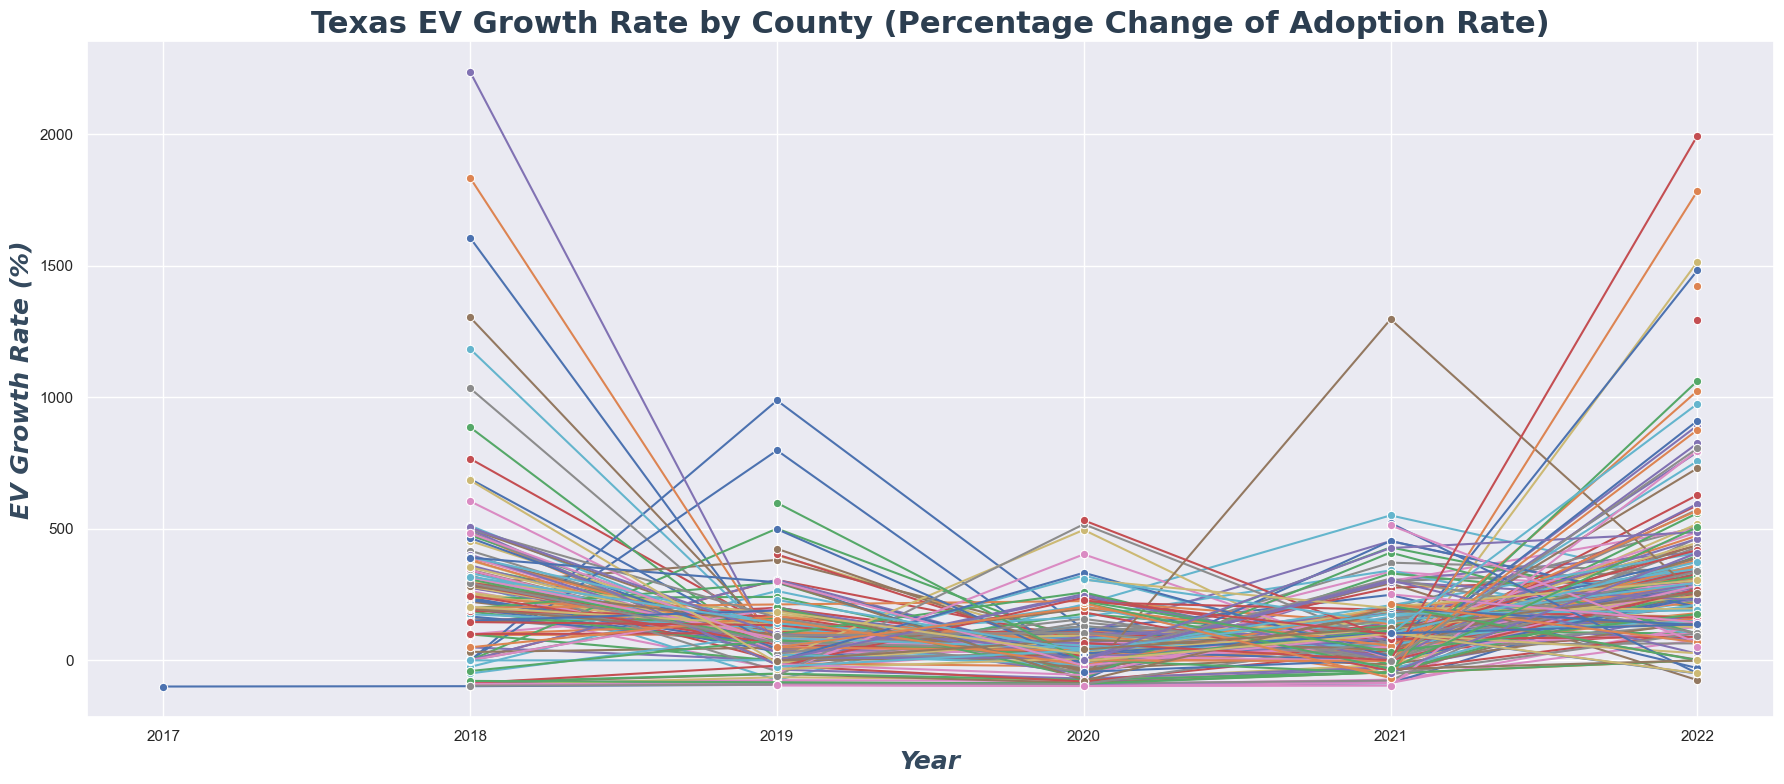

In [14]:


# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    tx_df,
    ax, 
    x="year", 
    y="ev_growth_rate", 
    hue="county",
    title="Texas EV Growth Rate by County (Percentage Change of Adoption Rate)",
    x_label="Year",
    y_label="EV Growth Rate (%)",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "tx_ev_growth_rate_by_county.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

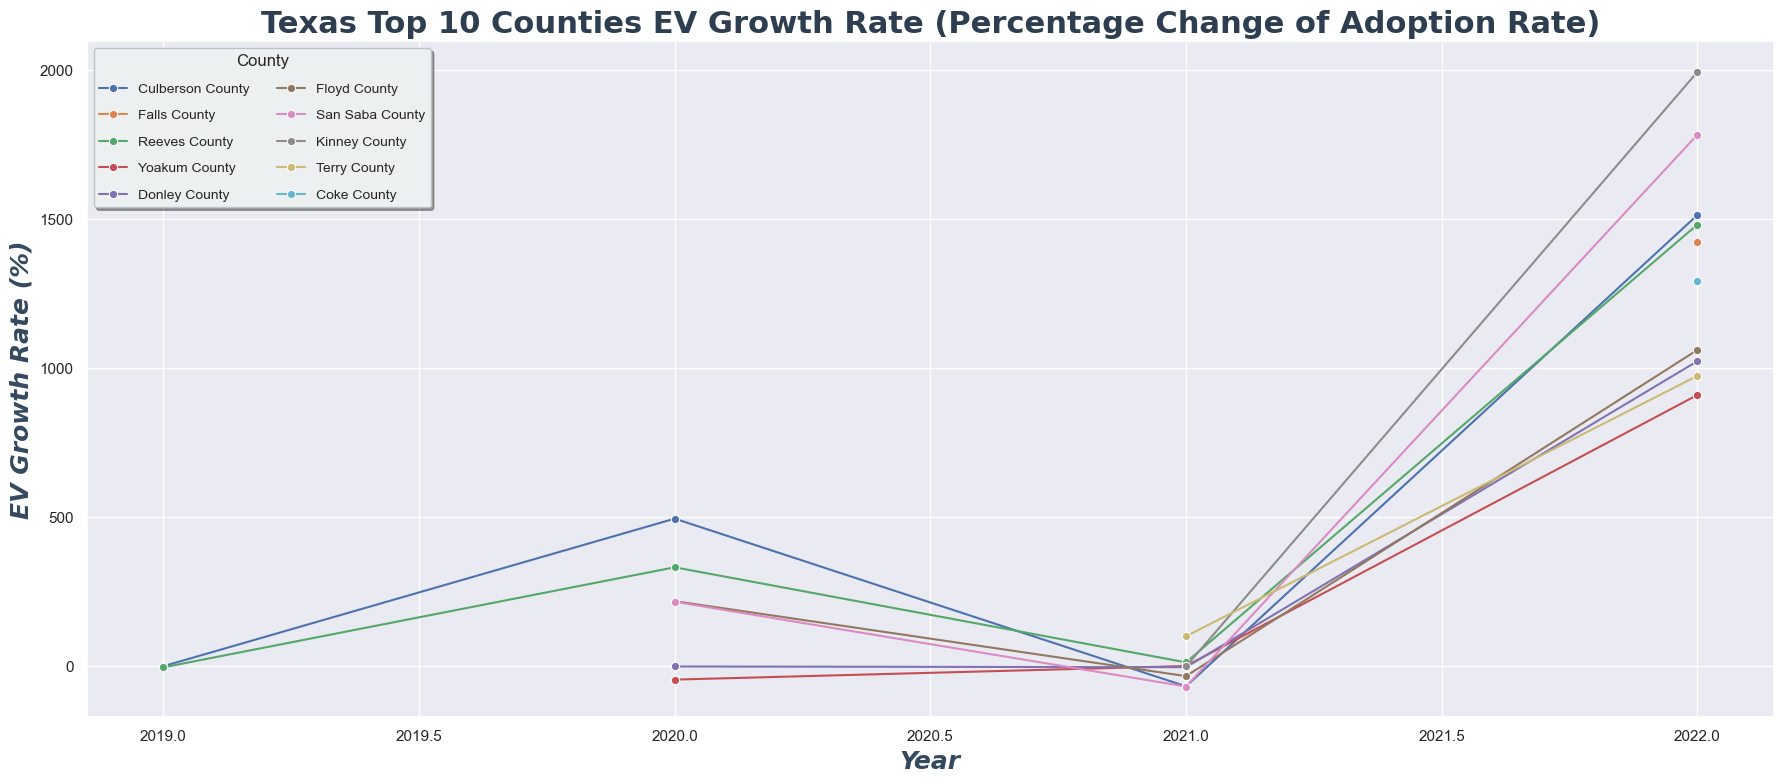

In [15]:


# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df=tx_top_10_df,
    ax=ax, 
    x="year", 
    y="ev_growth_rate", 
    hue="county",
    title="Texas Top 10 Counties EV Growth Rate (Percentage Change of Adoption Rate)",
    x_label="Year",
    y_label="EV Growth Rate (%)",
    leg_title="County",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "tx_top_10_counties_ev_growth_rate.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
1047,2022,TX,Kinney County,[78832],3131,21,0,52386,0.670712,1993.963590
1112,2022,TX,San Saba County,"[76824, 76832, 76871, 76877]",5880,19,0,54087,0.323129,1783.520408
973,2022,TX,Culberson County,[79855],2163,32,0,35924,1.479427,1514.054554
1102,2022,TX,Reeves County,"[79718, 79770, 79772, 79780, 79785, 79786]",11692,57,0,57487,0.487513,1482.101009
990,2022,TX,Falls County,"[76570, 76632, 76656, 76661, 76680, 76685]",16956,15,0,45172,0.088464,1424.327672
961,2022,TX,Coke County,"[76933, 76945, 76949, 76953]",3322,14,1,40230,0.421433,1292.414208
994,2022,TX,Floyd County,"[79221, 79231, 79235, 79241, 79258]",5239,23,0,49321,0.439015,1061.633900
982,2022,TX,Donley County,"[79226, 79237, 79240]",3289,11,0,51711,0.334448,1024.080268
1127,2022,TX,Terry County,"[79316, 79345, 79376, 79378]",11444,21,0,42694,0.183502,974.772807
1154,2022,TX,Yoakum County,"[79323, 79355]",7484,10,1,80317,0.133618,910.555852


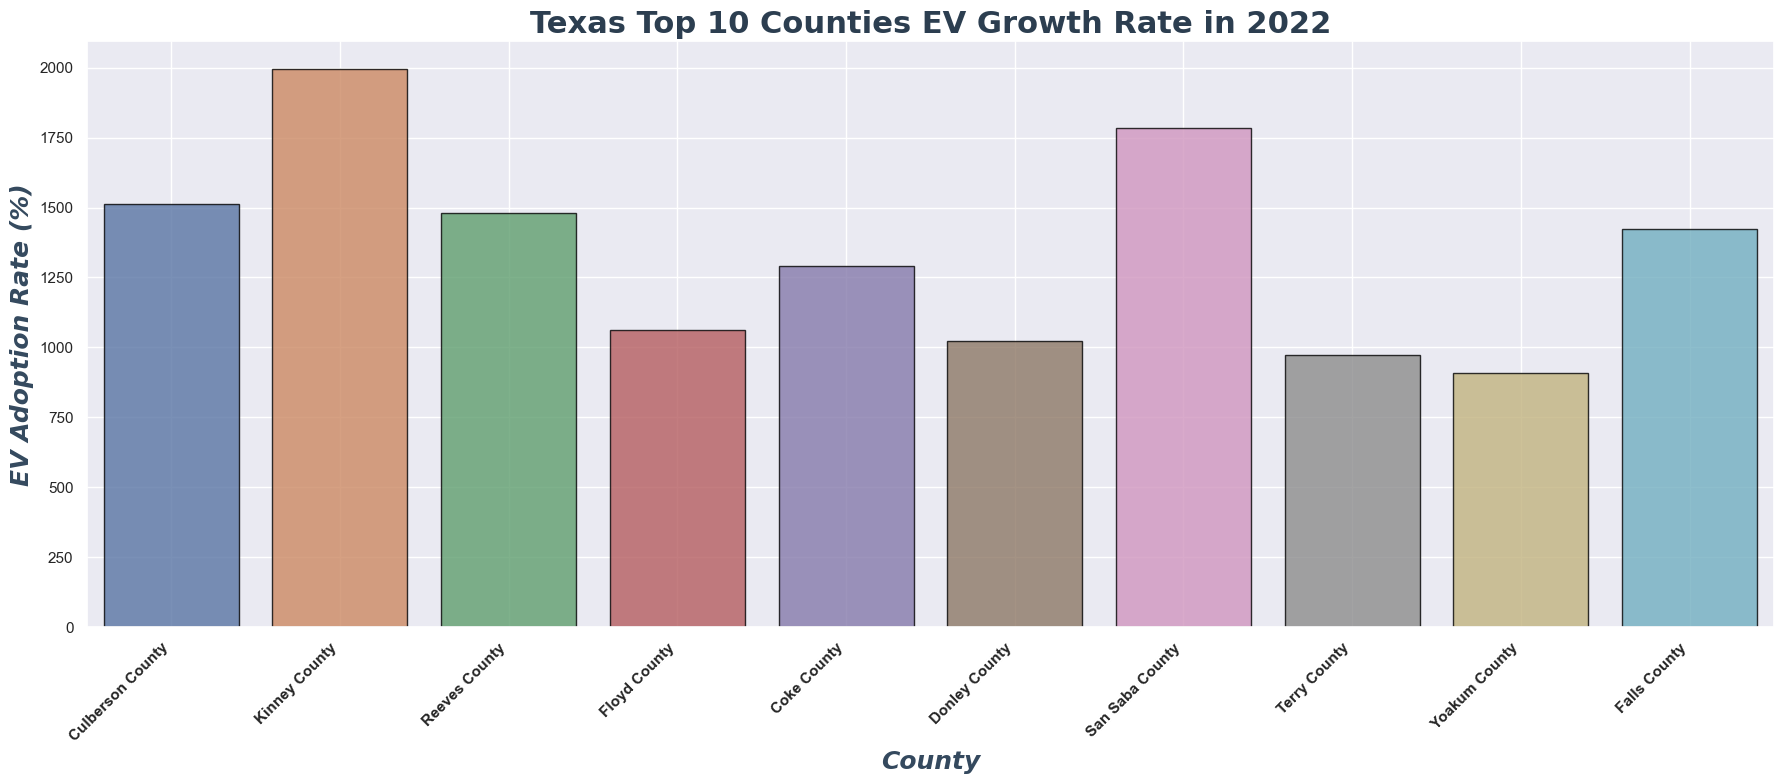

In [16]:


# Filter the data for the year to plot for Texas
year_to_plot = 2022
year_df = tx_top_10_df[tx_top_10_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='county', 
    y='ev_growth_rate', 
    hue='county',
    title=f'Texas Top 10 Counties EV Growth Rate in {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

file_name = "tx_top_10_counties_2022.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

display(year_df.sort_values(by='ev_growth_rate', ascending=False))

# Show the plot
plt.show()

# Florida Visualizations: Growth Rate

In [17]:
fl_df.hvplot.line(
    x='year',
    y='ev_growth_rate',
    by='county',
    title='EV Growth Rate in Florida (Percentage Change of Adoption Rate)',
    xlabel='Year',
    ylabel='EV Growth Rate (%)',
    legend='top',
    fontscale=1.2,
    width=750,
    height=500,
)

:NdOverlay   [county]
   :Curve   [year]   (ev_growth_rate)

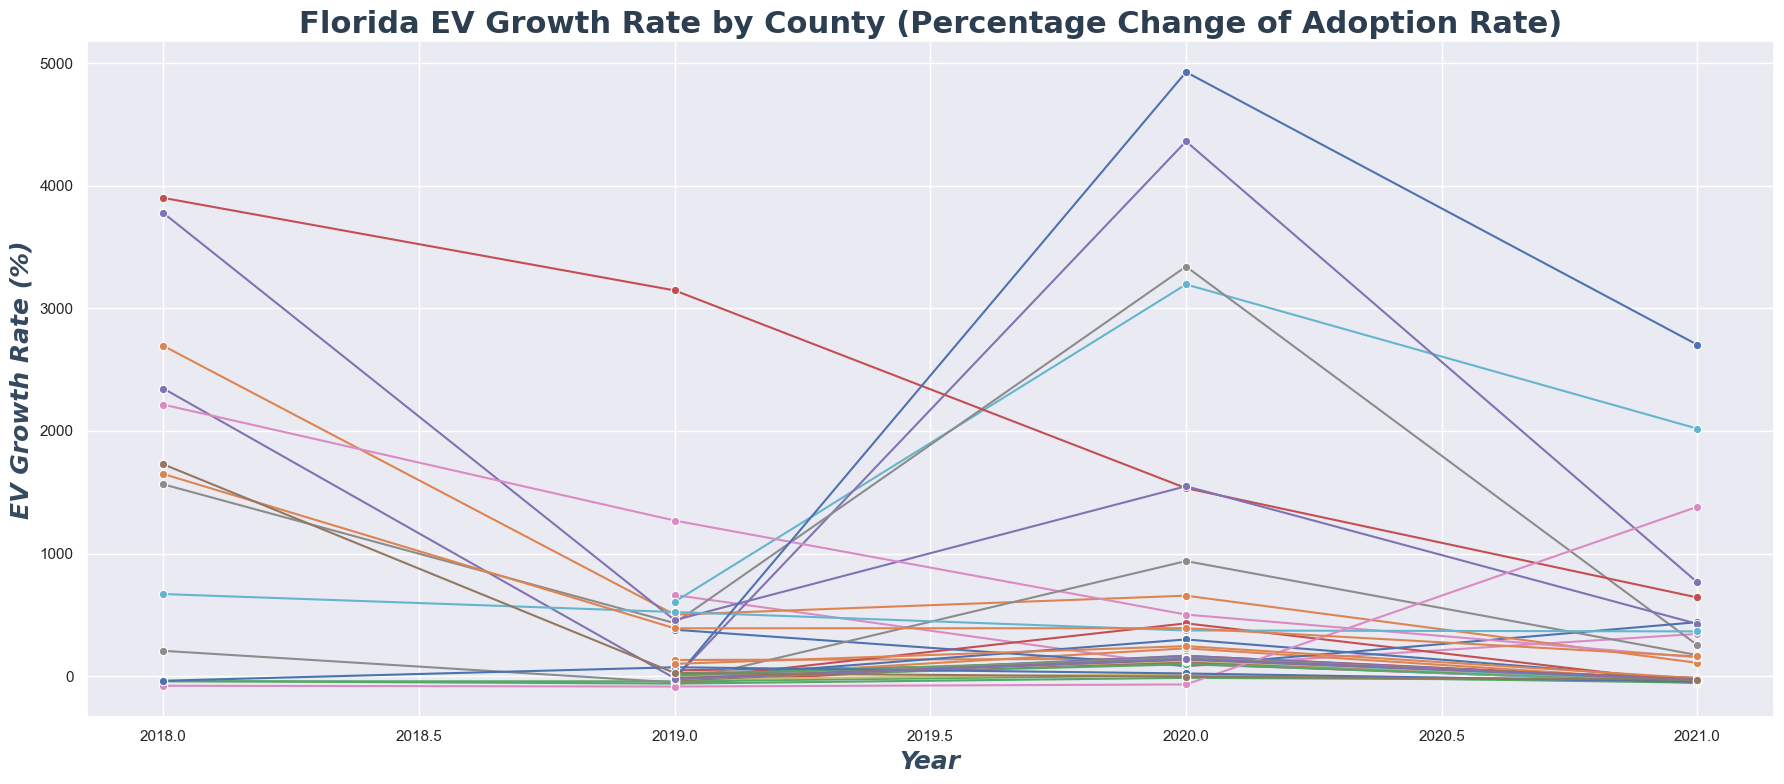

In [18]:


# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    fl_df,
    ax, 
    x="year", 
    y="ev_growth_rate", 
    hue="county",
    title="Florida EV Growth Rate by County (Percentage Change of Adoption Rate)",
    x_label="Year",
    y_label="EV Growth Rate (%)",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "fl_ev_growth_rate_by_county.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

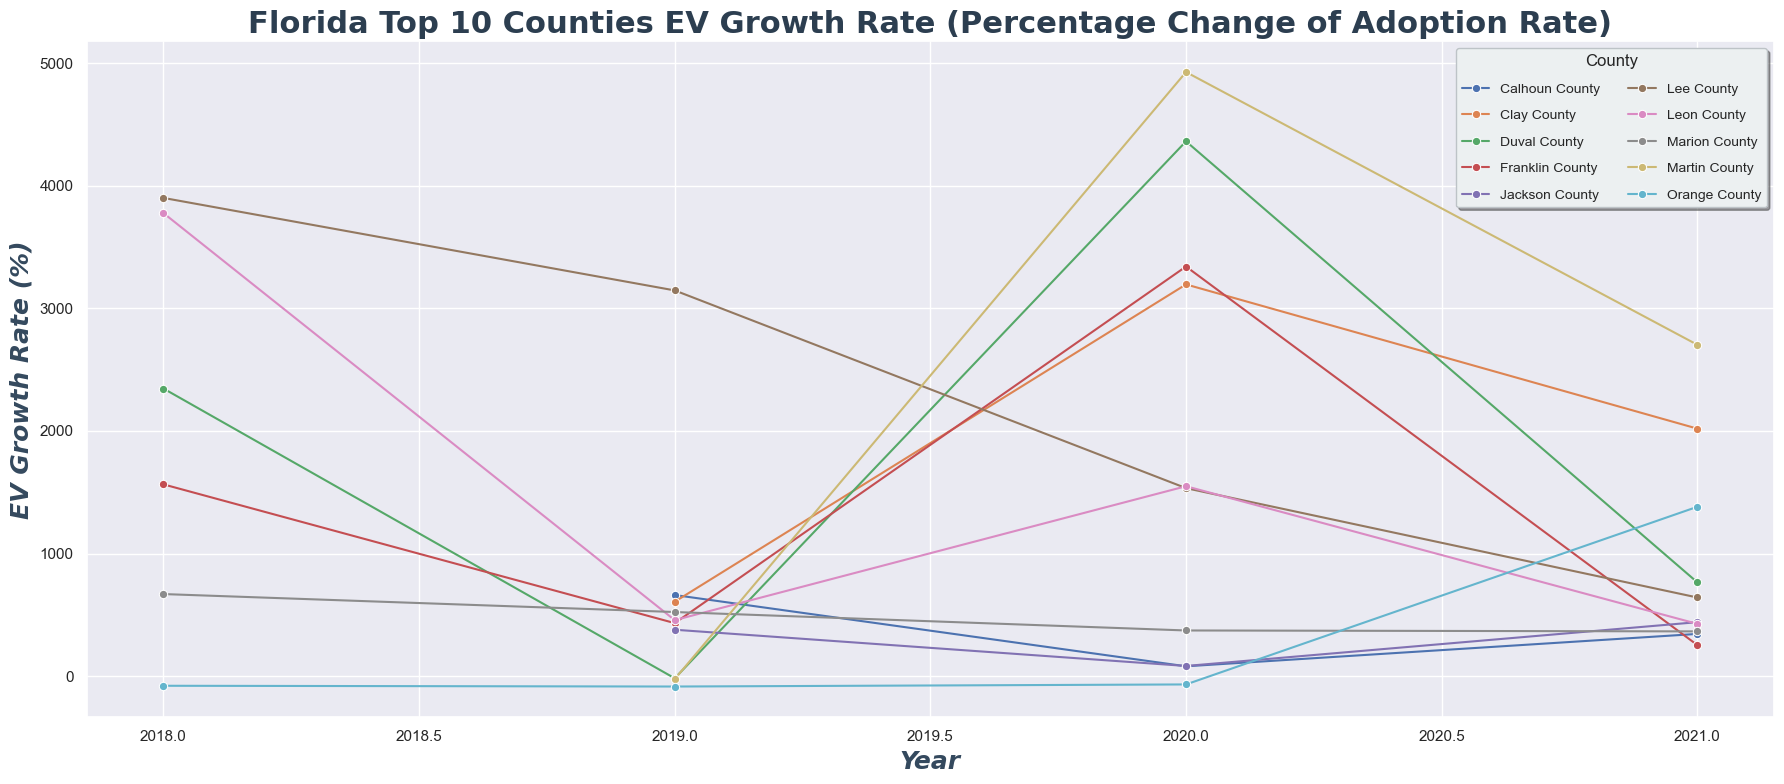

In [19]:


# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df=fl_top_10_df,
    ax=ax, 
    x="year", 
    y="ev_growth_rate", 
    hue="county",
    title="Florida Top 10 Counties EV Growth Rate (Percentage Change of Adoption Rate)",
    x_label="Year",
    y_label="EV Growth Rate (%)",
    leg_title="County",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "fl_top_10_counties_ev_growth_rate.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
238,2021,FL,Martin County,"[33455, 33475, 34956, 34957, 34958, 34990, 349...",160197,855,10,69769,0.533718,2703.086200
207,2021,FL,Clay County,"[32003, 32006, 32030, 32043, 32050, 32065, 320...",222648,460,0,74059,0.206604,2019.138730
244,2021,FL,Orange County,"[32703, 32704, 32709, 32710, 32712, 32733, 327...",1427761,7738,172,65784,0.541967,1381.739031
212,2021,FL,Duval County,"[32099, 32201, 32202, 32203, 32204, 32205, 322...",1002774,2656,63,59541,0.264865,766.109412
231,2021,FL,Lee County,"[33900, 33901, 33902, 33903, 33904, 33905, 339...",790888,2683,42,63235,0.339239,642.339592
228,2021,FL,Jackson County,"[32420, 32423, 32426, 32431, 32432, 32440, 324...",47119,17,2,43416,0.036079,441.074726
232,2021,FL,Leon County,"[32301, 32302, 32303, 32304, 32305, 32306, 323...",296007,893,28,57359,0.301682,427.340232
237,2021,FL,Marion County,"[32111, 32113, 32133, 32134, 32179, 32182, 321...",385135,736,0,50808,0.191102,365.906241
204,2021,FL,Calhoun County,"[32421, 32424, 32430, 32449]",13518,6,0,38098,0.044385,345.272969
215,2021,FL,Franklin County,"[32320, 32322, 32323, 32328, 32329]",12183,25,0,52679,0.205204,254.626666


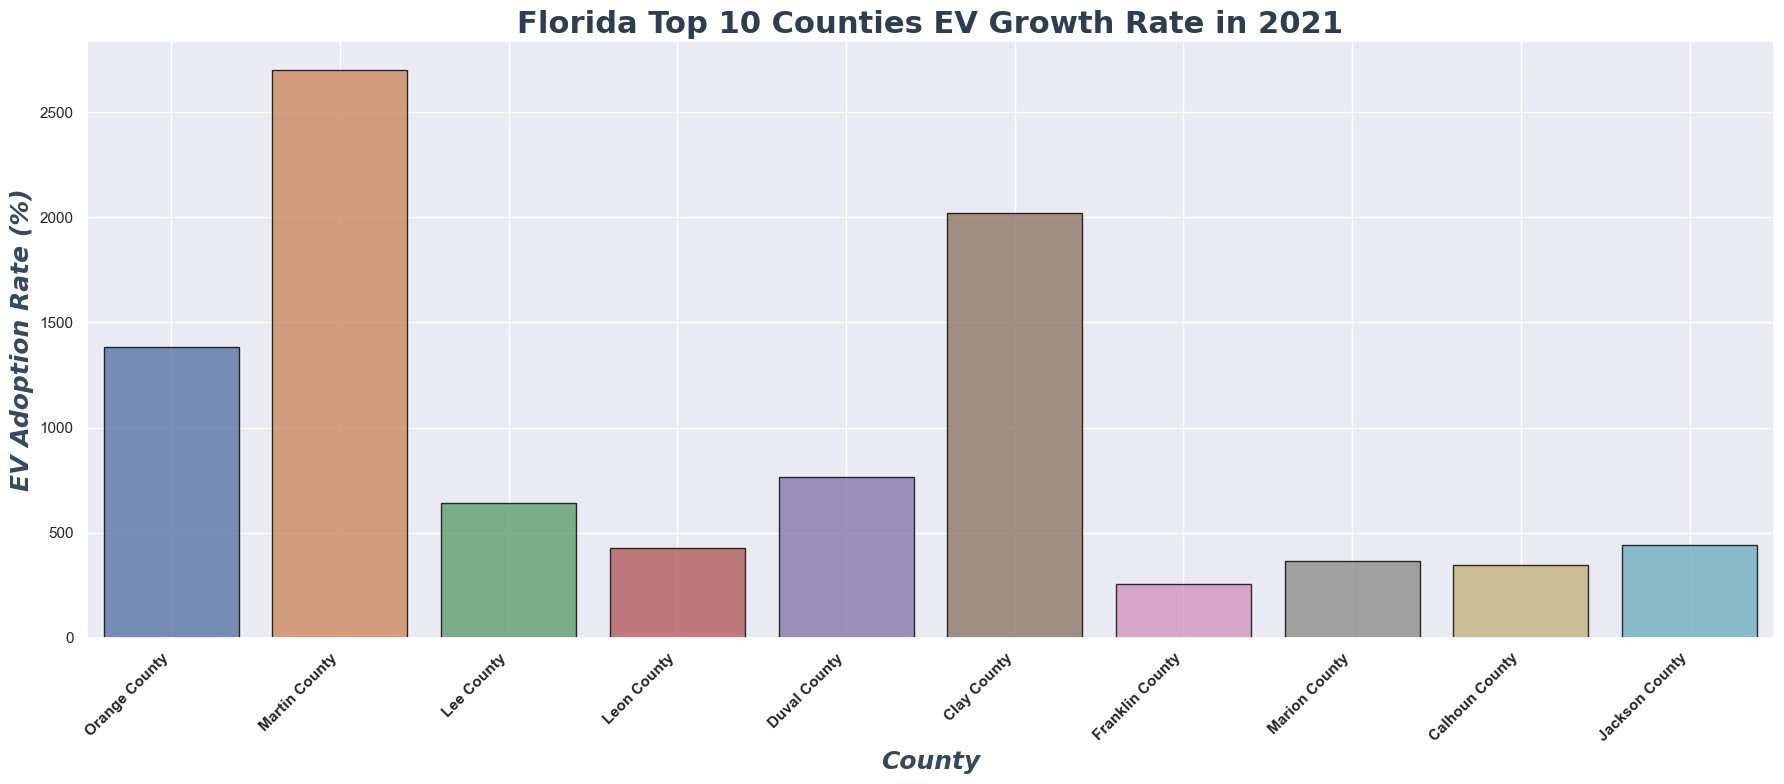

In [20]:

# Filter the data for the year to plot for Texas
year_to_plot = 2021
year_df = fl_top_10_df[fl_top_10_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='county', 
    y='ev_growth_rate', 
    hue='county',
    title=f'Florida Top 10 Counties EV Growth Rate in {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

file_name = "fl_top_10_counties_2022.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

display(year_df.sort_values(by='ev_growth_rate', ascending=False))

# Show the plot
plt.show()

# California Visualizations: : Growth Rate

In [21]:
ca_df.hvplot.line(
    x='year',
    y='ev_growth_rate',
    by='county',
    title='EV Growth Rate in California (Percentage Change of Adoption Rate)',
    xlabel='Year',
    ylabel='EV Growth Rate (%)',
    legend='top',
    fontscale=1.2,
    width=750,
    height=500,
)

:NdOverlay   [county]
   :Curve   [year]   (ev_growth_rate)

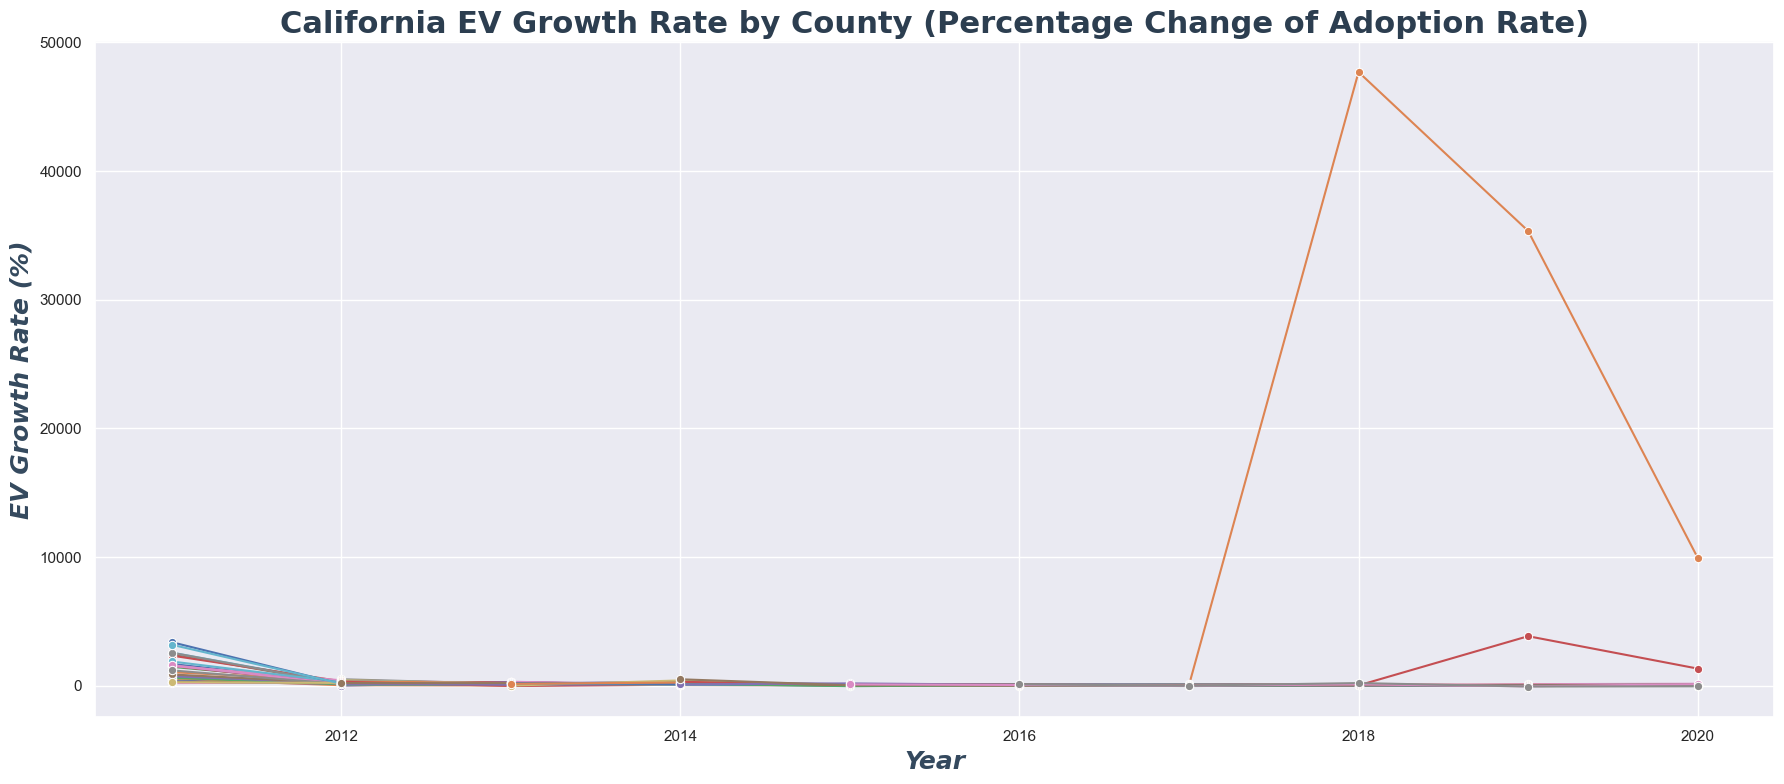

In [22]:


# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    ca_df,
    ax, 
    x="year", 
    y="ev_growth_rate", 
    hue="county",
    title="California EV Growth Rate by County (Percentage Change of Adoption Rate)",
    x_label="Year",
    y_label="EV Growth Rate (%)",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "ca_ev_growth_rate_by_county.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

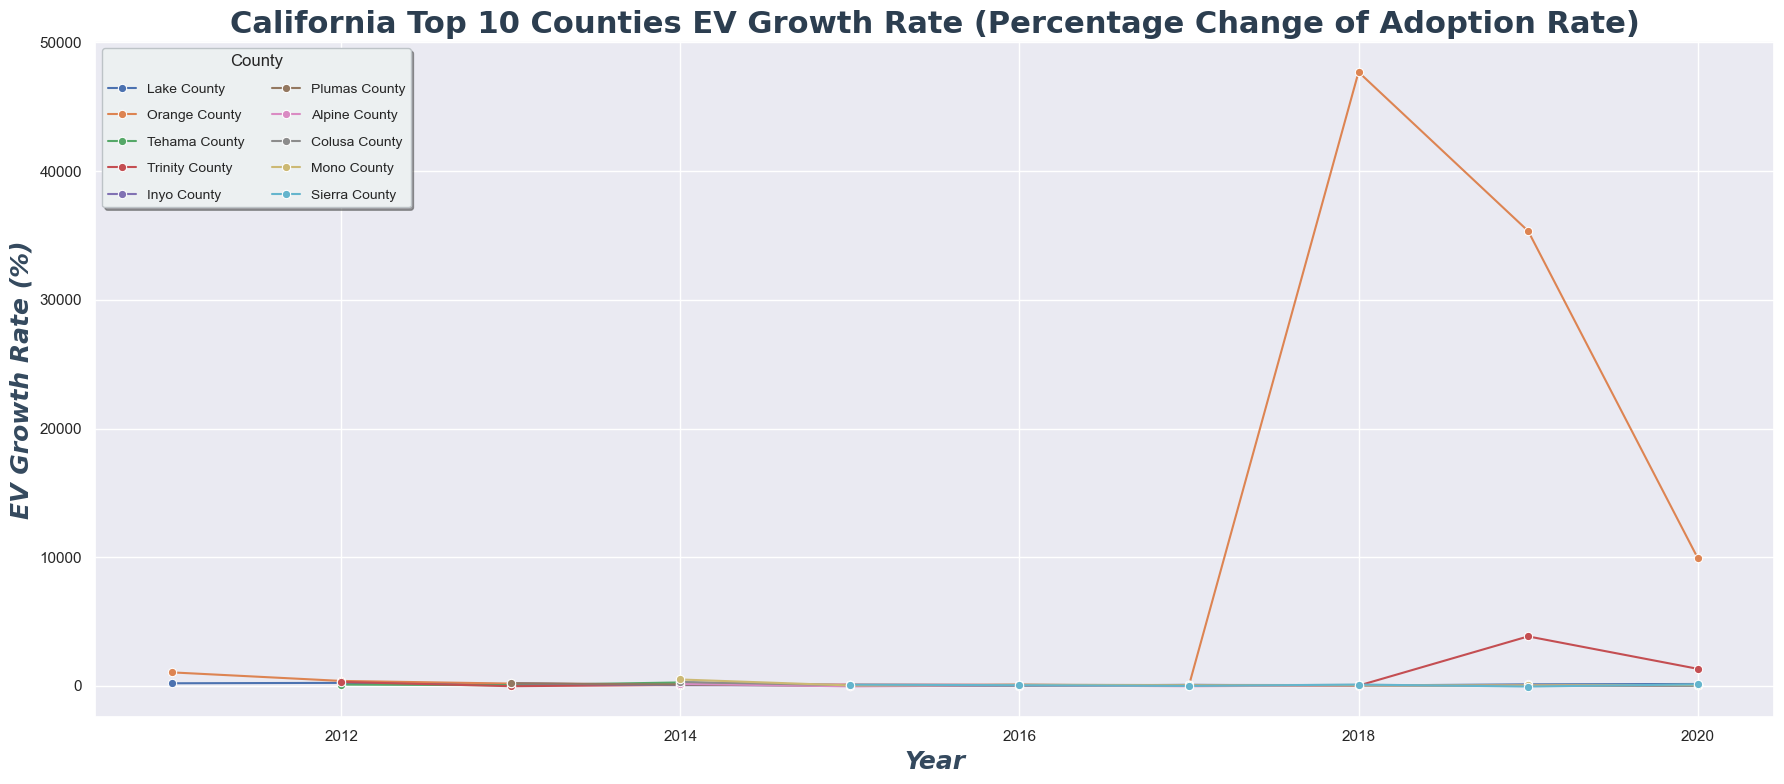

In [23]:


# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df=ca_top_10_df,
    ax=ax, 
    x="year", 
    y="ev_growth_rate", 
    hue="county",
    title="California Top 10 Counties EV Growth Rate (Percentage Change of Adoption Rate)",
    x_label="Year",
    y_label="EV Growth Rate (%)",
    leg_title="County",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "ca_top_10_counties_ev_growth_rate.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
560,2020,CA,Orange County,"[90620, 90621, 90622, 90623, 90624, 90630, 906...",3185734,76706,499,94441,2.407797,9940.030925
583,2020,CA,Trinity County,"[95527, 95552, 95563, 95595, 96010, 96024, 960...",16091,47,0,41780,0.292089,1326.464069
547,2020,CA,Lake County,"[95422, 95423, 95424, 95426, 95435, 95443, 954...",68199,376,4,49254,0.551328,148.042076
576,2020,CA,Sierra County,"[95910, 95936, 95944, 96118, 96124, 96125, 96126]",3225,7,0,52103,0.217054,117.416021
556,2020,CA,Mono County,"[93512, 93517, 93529, 93541, 93546, 96107, 96133]",13228,67,0,64924,0.506501,78.436723
532,2020,CA,Alpine County,"[95646, 96120, 96156]",1205,11,2,85750,0.912863,71.770401
536,2020,CA,Colusa County,"[95912, 95932, 95950, 95955, 95970, 95979, 95987]",21864,45,0,59427,0.205818,58.384134
562,2020,CA,Plumas County,"[95915, 95923, 95934, 95947, 95956, 95971, 959...",19746,52,0,57233,0.263344,45.668222
544,2020,CA,Inyo County,"[92328, 92384, 92389, 93513, 93514, 93515, 935...",18987,78,7,59296,0.410807,39.821785
582,2020,CA,Tehama County,"[96021, 96022, 96029, 96035, 96055, 96059, 960...",65687,143,5,48895,0.217699,29.988325


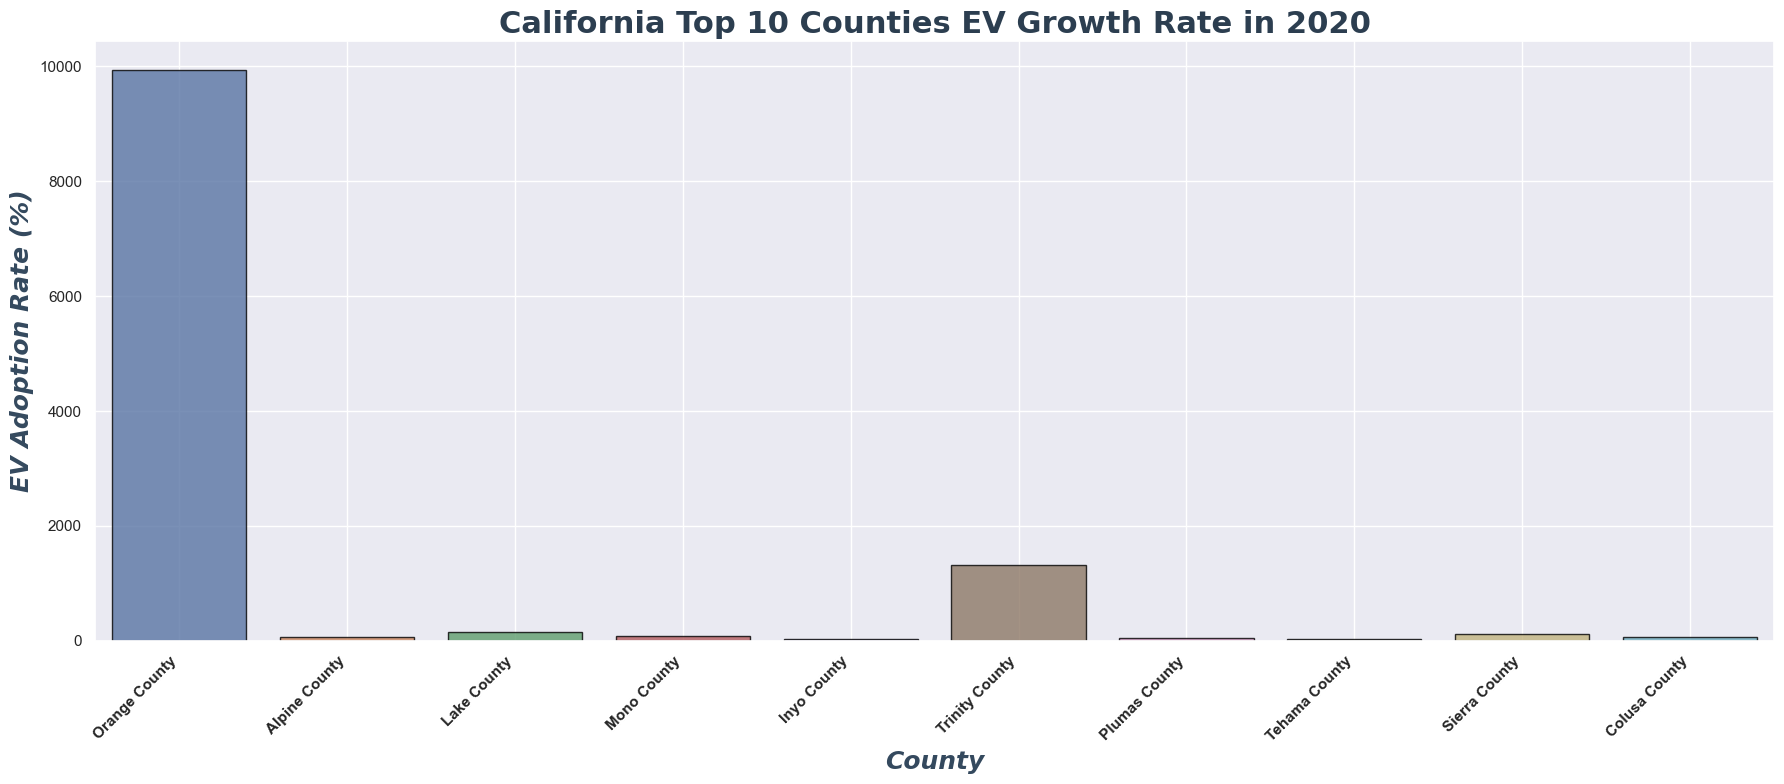

In [24]:


# Filter the data for the year to plot for Texas
year_to_plot = 2020
year_df = ca_top_10_df[ca_top_10_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='county', 
    y='ev_growth_rate', 
    hue='county',
    title=f'California Top 10 Counties EV Growth Rate in {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

file_name = "ca_top_10_counties_2022.png"
file_path = Path(f"../../../../../reports/figures/growth_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

display(year_df.sort_values(by='ev_growth_rate', ascending=False))

# Show the plot
plt.show()